In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from classicalfield import FiniteTempGPE as gpe

from scipy.fft import fft2, ifft2, fftshift, ifftshift 
from scipy.optimize import curve_fit

Generate GPE objects for the box and vortex cases

In [3]:
g_b = gpe(numImagSteps=500, numRealSteps = 10, Nsamples=30, vortex = False) # 15, 10000
g_v = gpe(numImagSteps=500, numRealSteps = 10, Nsamples=30, vortex = True) # 15, 10000

No vortices to be spawned
Total Imag Time:  52.50554323196411
Total Imag Time:  56.00634145736694


## Initial State Analysis

### Box Trap

Text(0.5, 1.0, 'Initial Position Densities at T=10.35 in an Optical Box Trap')

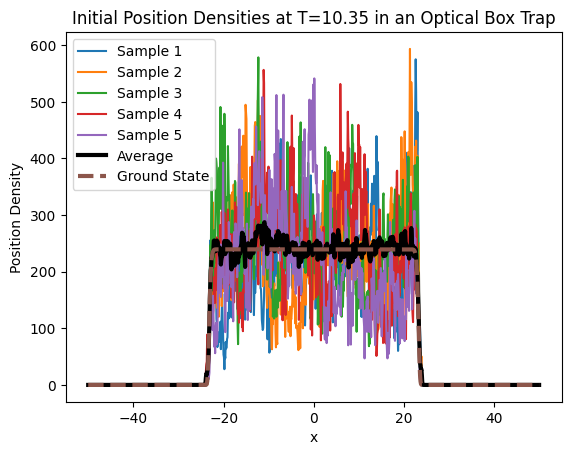

In [4]:
avg_dens = np.mean(np.abs(g_b.final_psis)**2, axis = 0, dtype = np.complex_)

plt.figure() 
for i in range(5): 
    plt.plot(g_b.xi[0][0], np.abs(g_b.final_psis[i])[len(g_b.final_psis[0])//2]**2, label = f'Sample {i+1}')
plt.plot(g_b.xi[0][0], np.abs(avg_dens)[len(avg_dens)//2], label = 'Average', linewidth = 3, color= 'black')
plt.plot(g_b.xi[0][0], np.abs(g_b.gs[len(g_b.gs)//2])**2, linewidth = 3, linestyle = '--', label = 'Ground State')
plt.legend() 
plt.xlabel('x')
plt.ylabel('Position Density')
plt.title(f'Initial Position Densities at T={g_b.T:.2f} in an Optical Box Trap')

In [5]:
## extract box from ground state 
grid = g_b.xi
mask = (np.abs(grid[0])<g_b.L//2)&(np.abs(grid[1])<g_b.L//2)
dim = int(np.sqrt(np.shape(grid[0][mask])))
small_gs = g_b.gs[mask].reshape((dim, dim))

In [10]:
# find the average psiK 
psik = []
total_wfks = []
for i in range(10): 
    psik.append(g_b.genPsiK()) 
psik = g_b.winL/g_b.dx**2 *np.array(psik)

avg_thermal = np.mean(np.abs(psik)**2, axis = 0, dtype = np.complex_)

total_wfk = fft2(g_b.gs) + np.mean(psik, axis = 0, dtype = np.complex_) 
for i in range(len(psik)): 
    total_wfks.append(fft2(g_b.gs) + psik[i])

avg_wfk = np.mean(total_wfks, axis = 0, dtype = np.complex_)

# break this down step by step - make sure when you add the gs the same pictured result is found (try also without extracting the box)


In [54]:
cross_term = g_b.gs*(np.conj(psik[0])+(psik[0]))

C:\Users\TQC User\AppData\Local\Temp\ipykernel_29172\3784366561.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g_b.ki[0][0]), fftshift(coef**2*2*g_b.T/g_b.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')


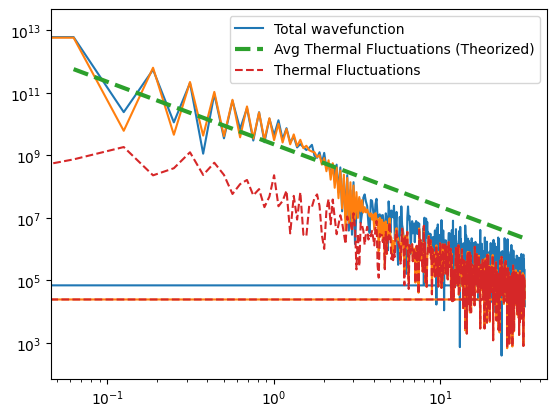

In [101]:
coef = g_b.winL/g_b.dx**2
plt.figure() 
plt.plot(g_b.ki[0][0], np.abs(total_wfk[0])**2, label = 'Total wavefunction')
plt.plot(g_b.ki[0][0], np.abs(np.mean(psik, axis = 0, dtype = np.complex_)[0] )**2+np.abs(fft2(g_b.gs))[0]**2)
plt.plot(fftshift(g_b.ki[0][0]), fftshift(coef**2*2*g_b.T/g_b.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
#plt.plot(fftshift(g_b.ki[0][0]), fftshift(np.abs(fft2(g_b.gs)[0])**2))
plt.plot(g_b.ki[0][0], np.abs(np.mean(psik, axis = 0, dtype = np.complex_)[0] )**2, label = 'Thermal Fluctuations', linestyle = '--')
# plt.plot(g_b.ki[0][0], np.mean(psik, axis = 0, dtype = np.complex_)[0])
#plt.plot(g_b.ki[0][0], avg_thermal[0])

# plt.plot(g_b.ki[0][0], np.abs(fft2(g_b.gs))[0]**2)
# plt.plot(g_b.ki[0][0], np.abs(psik[-1][0])**2)
# plt.plot(g_b.ki[0][0], avg_thermal[0])
plt.yscale('log') 
plt.xscale('log')
plt.legend()
plt.show() 

Compare average(psik)^2 to average(psik^2) 
Plot the thermal fluctuations with the rest to create clean plots for LaTeX file 

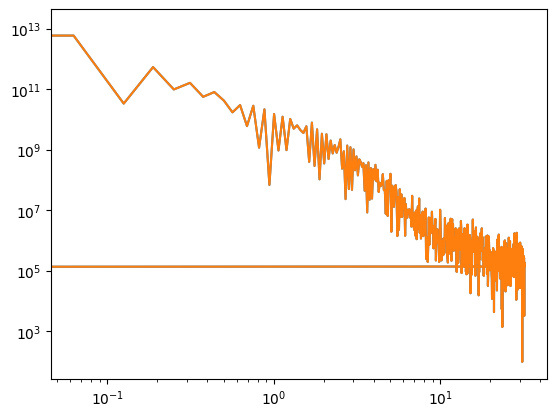

In [13]:
plt.figure() 
plt.plot(g_b.ki[0][0], np.abs(avg_wfk)[0]**2)
plt.plot(g_b.ki[0][0], np.abs(total_wfk)[0]**2)
plt.yscale('log')
plt.xscale('log')

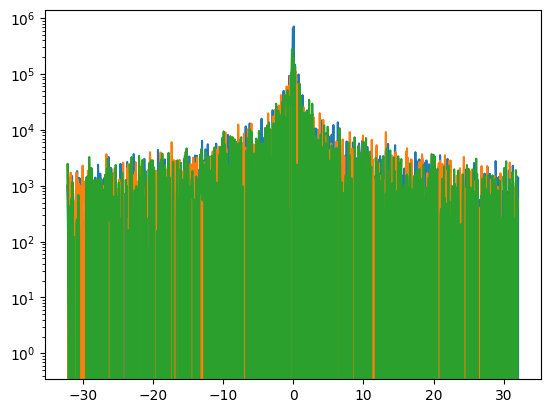

In [43]:
for i in range(3): 
    plt.plot(g_b.ki[0][0], psik[0][i])
#plt.plot(g_b.ki[0][0], np.abs(np.mean(psik, axis = 0, dtype = np.complex_)[0] ))

plt.yscale('log')

In [86]:
# find the average psiK 
psik = []
for i in range(40): 
    psik.append(g_b.genPsiK()) 
psik = g_b.winL/g_b.dx**2 *np.array(psik)

Text(0.5, 1.0, 'Initial Momentum Densities at T=10.35 in an Optical Box Trap')

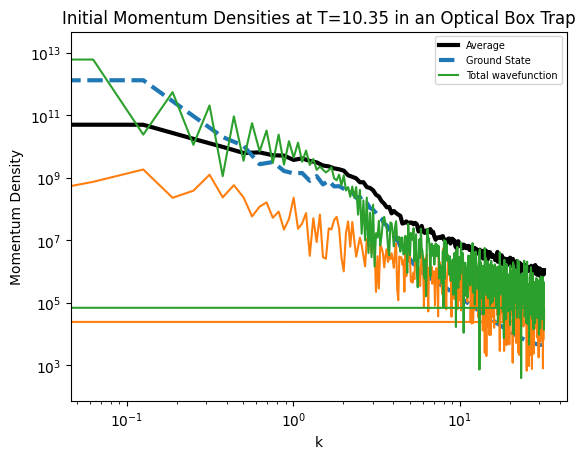

In [103]:
# now test in k space

coef = g_b.winL/g_b.dx**2

kdens_avg = np.mean(np.abs(g_b.short_wfk)**2, axis = 0, dtype = np.complex_)

plt.figure() 
# for i in range(5): 
#     plt.plot(fftshift(g_b.kgrid_short), fftshift(np.abs(g_b.short_wfk[i])[0]**2), label = f'Sample {i+1}')
# for i in range(len(g.short_wfk)):
#     plt.plot(fftshift(g.kgrid_short), fftshift(np.abs(g.short_wfk[i])[0]**2))
plt.plot(fftshift(g_b.kgrid_short), fftshift(kdens_avg[0]), color = 'black', linewidth = 3, label = 'Average')
plt.plot(fftshift(g_b.kgrid_short), fftshift(np.abs(fft2(small_gs)[0])**2), label = 'Ground State', linewidth = 3, linestyle = '--')
plt.plot(g_b.ki[0][0], np.abs(np.mean(psik, axis = 0, dtype = np.complex_)[0] )**2)

plt.plot(g_b.ki[0][0], np.abs(total_wfk[0])**2, label = 'Total wavefunction')
#plt.plot(fftshift(g_b.ki[0][0]), fftshift(coef**2*2*g_b.T/g_b.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')

#plt.plot(g_b.ki[0][0], avg_thermal[0])
plt.legend(bbox_to_anchor = [1, 0.6]) 
plt.legend(prop={'size':7}, loc = 'best')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('Momentum Density')
plt.title(f'Initial Momentum Densities at T={g_b.T:.2f} in an Optical Box Trap')

## With Vortices

In [72]:
print(1/g_v.dx**2)

104.8576


Text(0.5, 1.0, 'Initial Position Densities at T=10.35 in an Optical Box Trap')

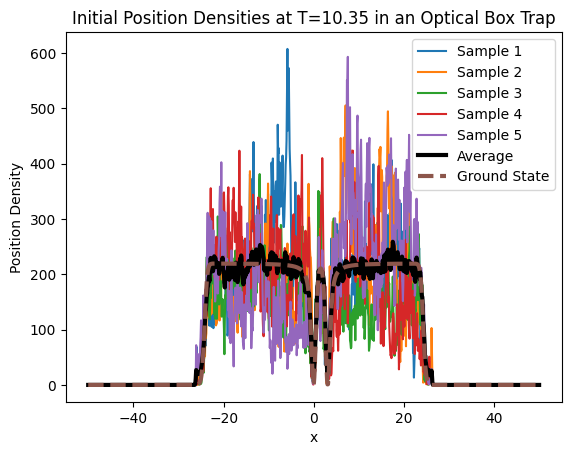

In [11]:
avg_dens = np.mean(np.abs(g_v.final_psis)**2, axis = 0, dtype = np.complex_)

plt.figure() 
for i in range(5): 
    plt.plot(g_v.xi[0][0], np.abs(g_v.final_psis[i])[len(g_v.final_psis[0])//2]**2, label = f'Sample {i+1}')
plt.plot(g_v.xi[0][0], np.abs(avg_dens)[len(avg_dens)//2], label = 'Average', linewidth = 3, color= 'black')
plt.plot(g_v.xi[0][0], np.abs(g_v.gs[len(g_v.gs)//2])**2, linewidth = 3, linestyle = '--', label = 'Ground State')
plt.legend() 
plt.xlabel('x')
plt.ylabel('Position Density')
plt.title(f'Initial Position Densities at T={g_v.T:.2f} in an Optical Box Trap')

In [12]:
## extract box from ground state 
grid = g_v.xi
mask = (np.abs(grid[0])<g_v.L//2)&(np.abs(grid[1])<g_v.L//2)
dim = int(np.sqrt(np.shape(grid[0][mask])))
small_gs = g_v.gs[mask].reshape((dim, dim))

C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\TQC User\AppData\Local\Temp\ipykernel_29172\996311421.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g_v.ki[0][0]), fftshift(coef**2*2*g_v.T/g_v.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')


Text(0.5, 1.0, 'Initial Momentum Densities at T=10.35 in an Optical Box Trap')

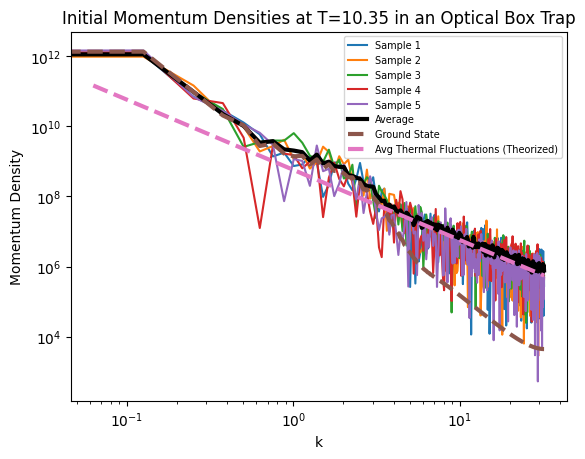

In [13]:
# now test in k space

coef = g_v.winL/g_v.dx**2/2

kdens_avg = np.mean(np.abs(g_v.short_wfk)**2, axis = 0, dtype = np.complex_)

plt.figure() 
for i in range(5): 
    plt.plot(fftshift(g_v.kgrid_short), fftshift(np.abs(g_v.short_wfk[i])[0]**2), label = f'Sample {i+1}')
# for i in range(len(g.short_wfk)):
#     plt.plot(fftshift(g.kgrid_short), fftshift(np.abs(g.short_wfk[i])[0]**2))
plt.plot(fftshift(g_v.kgrid_short), fftshift(kdens_avg[0]), color = 'black', linewidth = 3, label = 'Average')
plt.plot(fftshift(g_v.kgrid_short), fftshift(np.abs(fft2(small_gs)[0])**2), label = 'Ground State', linewidth = 3, linestyle = '--')
plt.plot(fftshift(g_v.ki[0][0]), fftshift(coef**2*2*g_v.T/g_v.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
plt.legend(bbox_to_anchor = [1, 0.6]) 
plt.legend(prop={'size':7}, loc = 'best')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('Momentum Density')
plt.title(f'Initial Momentum Densities at T={g_v.T:.2f} in an Optical Box Trap')